<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/vq_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VQ VAE

A Vector Quantized-Variational Autoencoder (VQ-VAE) is an extension of the traditional Variational Autoencoder (VAE) that incorporates discrete latent variables. In VQ-VAE, the encoder maps the input data to continuous latent variables, and a discrete codebook is introduced to quantize these continuous variables. This quantization helps to introduce a form of discrete structure into the latent space, making it more interpretable and potentially capturing more meaningful representations.

The key components of a VQ-VAE include:

1. **Encoder:** This part of the network maps the input data to continuous latent variables.

2. **Codebook:** A set of discrete vectors that serve as the representative centroids of the quantized latent space.

3. **Quantization:** The continuous latent variables from the encoder are quantized by finding the closest vector in the codebook. This discrete representation is then used in the subsequent stages.

4. **Decoder:** The decoder reconstructs the input data using both the quantized discrete latent variables and the continuous variables.

VQ-VAEs are particularly useful when dealing with data that exhibits a mix of continuous and discrete patterns. They find applications in generative tasks where having a structured and interpretable latent space is essential, such as in generating diverse and meaningful samples in image and speech synthesis.

In [1]:
# Install the library

!pip install rapidae

In [3]:
from keras import utils
from rapidae.data import load_MNIST
from rapidae.models import VQ_VAE
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_reconstructions

### Data

Download and preprocess the dataset. In this example, the selected dataset is the well-known MNIST composed of handwritten digit images.

Train and test labels are converted into one-hot encoding.

In [4]:
# Load MNIST dataset
data = load_MNIST()

x_train = data["x_train"].astype('float32') / 255
x_test = data["x_test"].astype('float32') / 255

# Obtaint number of clasess
n_classes = len(set(data["y_train"]))

2024-04-16 14:47:20 [INFO]: Downloading train-images-idx3-ubyte.gz...


2024-04-16 14:47:21 [INFO]: Downloading train-labels-idx1-ubyte.gz...
2024-04-16 14:47:21 [INFO]: Downloading t10k-images-idx3-ubyte.gz...
2024-04-16 14:47:21 [INFO]: Downloading t10k-labels-idx1-ubyte.gz...
2024-04-16 14:47:21 [INFO]: Deleting MNIST data...


### Model

Model's creation step. The selected encoder and decoder are similar to the ones used in the vanilla vae example for MNIST, but with a few changes related to latent space, since in VQ-vae we don't have available 'z_mean' and 'z_log_var' arrays.

In [6]:
# Model creation
model = VQ_VAE(input_dim=x_train.shape[1:],
               latent_dim=2)

2024-04-16 14:50:52 [INFO]: Trying to set encoder and decoder from child class...
2024-04-16 14:50:52 [INFO]: Encoder set from vq_vae.
2024-04-16 14:50:52 [INFO]: Decoder set from vq_vae.


### Training

Define the training pipeline. You can fix some hyperparameters related to training (learning rate, batch size, numer of epochs, etc.). You can also pass a list of model callbacks.

In [8]:
pipe = TrainingPipeline(name='vq_vae_MNIST',
                        model=model, num_epochs=20)

trained_model = pipe(x=x_train)

2024-04-16 14:51:38 [INFO]: +++ vq_vae_MNIST +++
2024-04-16 14:51:38 [INFO]: Creating folder in ./output_dir/vq_vae_MNIST_2024-04-16_14-51


2024-04-16 14:51:38 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: False
	Callbacks set: ['EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/20


2024-04-16 14:51:38.702762: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-04-16 14:51:40.478390: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30030336 exceeds 10% of free system memory.
2024-04-16 14:51:40.552449: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30030336 exceeds 10% of free system memory.
2024-04-16 14:51:40.555432: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29352960 exceeds 10% of free system memory.



Epoch 1: loss improved from inf to 0.01750, saving model to ./output_dir/vq_vae_MNIST_2024-04-16_14-51/model.weights.h5
469/469 - 42s - 89ms/step - loss: 0.0175 - reconstruction_loss: 0.0143 - vq_loss: 0.0032
Epoch 2/20

Epoch 2: loss improved from 0.01750 to 0.00554, saving model to ./output_dir/vq_vae_MNIST_2024-04-16_14-51/model.weights.h5
469/469 - 40s - 85ms/step - loss: 0.0055 - reconstruction_loss: 0.0052 - vq_loss: 3.3616e-04
Epoch 3/20

Epoch 3: loss improved from 0.00554 to 0.00475, saving model to ./output_dir/vq_vae_MNIST_2024-04-16_14-51/model.weights.h5
469/469 - 40s - 85ms/step - loss: 0.0048 - reconstruction_loss: 0.0044 - vq_loss: 3.5587e-04
Epoch 4/20

Epoch 4: loss improved from 0.00475 to 0.00443, saving model to ./output_dir/vq_vae_MNIST_2024-04-16_14-51/model.weights.h5
469/469 - 40s - 85ms/step - loss: 0.0044 - reconstruction_loss: 0.0041 - vq_loss: 3.5452e-04
Epoch 5/20

Epoch 5: loss improved from 0.00443 to 0.00426, saving model to ./output_dir/vq_vae_MNIST_2

2024-04-16 15:04:31 [INFO]: Restoring best model
2024-04-16 15:04:31 [INFO]: Best model restored


### Evaluation

Let's now check the performance of the model. The original images are displayed in the first row and the reconstructions in the second. 

These results look decent but you can play around with some hyperparameters like the dimensionality of the embedding to get better results.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


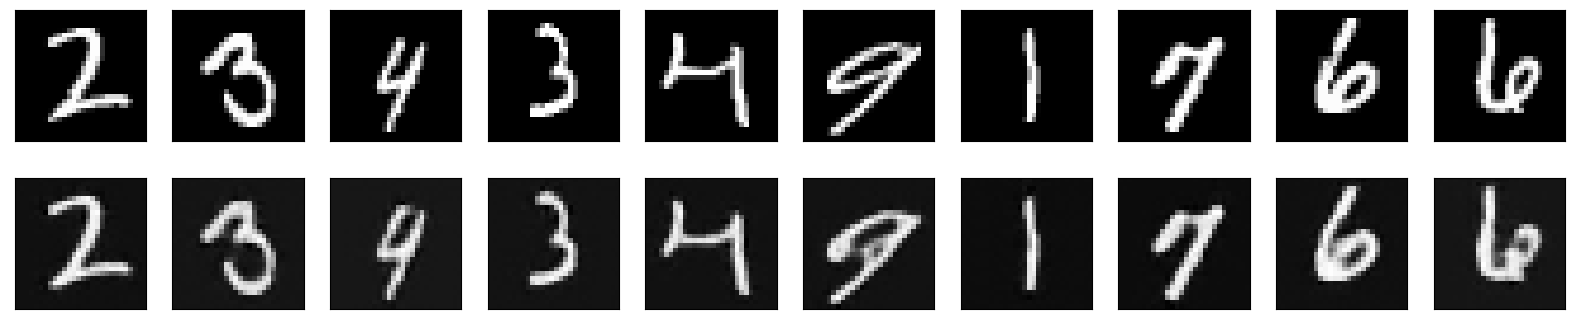

In [9]:
outputs = trained_model.predict(x_test)

plot_reconstructions(x_test, outputs['x_recon'])